# CLI interface of keras_segmentation

### Dependencies

In [2]:
import numpy as np
from imageio import imread
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import tensorflow
from imageio import imread

### Install the package

In [3]:
%%capture
! pip install git+https://github.com/biggie-inc/image-segmentation-keras.git

## Prep the Data for Proper Config

In [4]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 Biggie
'Colab Notebooks'
'Copy of Whiteboard Warriors #21 - Group 1 .gdoc'
 DATA
'Data Science Notes.gdoc'
'Deep Learning with PyTorch Chapter 1+2 notes.gdoc'
'Deep Learning with PyTorch Chapter 3 notes.gdoc'
'GitHub Contributions Quick Guide.gdoc'
'Hadoop Tutorial.gdoc'
'How to Efficiently Learn Your Next Thing.gdoc'
'Job Search'
'Mentor Meeting Agendas.gdoc'
 Modules
'My Drive'
 Networking
'Presenting from a Jupyter Notebook.gdoc'
'R Notes.gdoc'
'Setting up a virtual environment.gdoc'
'Thinkful Data-201 Syllabus.gdoc'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet.gsheet'
 yolov3


In [5]:
%%capture
!cp /mydrive/Biggie/segnet_initial_train_100.zip ./

!mkdir ./segnet_initial_train_100
!unzip  ./segnet_initial_train_100.zip -d ./segnet_initial_train_100


!cp /mydrive/Biggie/ASS/class_dict.csv ./class_dict.csv

In [6]:
!mkdir ./dataset
!mkdir ./dataset/annotations_prepped_train
!mkdir ./dataset/annotations_prepped_test
!mkdir ./dataset/images_prepped_train
!mkdir ./dataset/images_prepped_test

#### Converting all images to RBG and saving as .jpgs to remove 4th dimension from .pngs


In [7]:

# glob images
image_set = sorted(glob('/content/segnet_initial_train_100/*1.png'))
mask_set = sorted(glob('/content/segnet_initial_train_100/*gt.png'))


In [8]:

# Places 90 images in Train
for i, j in zip(image_set[:-10], mask_set[:-10]):
    image_filename = i.split('/')[-1].split('.')[0].replace(' ', '_') # getting image filename and replacing space with underscore

    image = Image.open(i)
    mask = Image.open(j)

    image_rgb = image.convert('RGB')
    #mask_rgb = mask.convert('RGB') converting to RGB increased mask dimensions to 3... duh

    image_rgb.save(f'/content/dataset/images_prepped_train/{image_filename}.jpg')
    mask.save(f'/content/dataset/annotations_prepped_train/{image_filename}.png') # this model currently requires annotations in PNG and requires them to match the initial file name

In [9]:

# Places 10 images in test
for i, j in zip(image_set[-10:], mask_set[-10:]):
    image_filename = i.split('/')[-1].split('.')[0].replace(' ', '_')

    image = Image.open(i)
    mask = Image.open(j)

    image_rgb = image.convert('RGB')
    #mask_rgb = mask.convert('RGB') converting to RGB increased channels to 3... duh

    image_rgb.save(f'/content/dataset/images_prepped_test/{image_filename}.jpg')
    mask.save(f'/content/dataset/annotations_prepped_test/{image_filename}.png') # this model currently requires annotations in PNG and requires them to match the initial file name

In [10]:
%cd /content/

/content


### Start training on ResNet50-SegNet

In [ ]:
#! python -m keras_segmentation train --checkpoints_path="/tmp/vgg_unet_1" --train_images="dataset1/images_prepped_train/" --train_annotations="dataset1/annotations_prepped_train/" --val_images="dataset1/images_prepped_test/" --val_annotations="dataset1/annotations_prepped_test/" --n_classes=50 --input_height=320 --input_width=640 --model_name="vgg_unet" --epochs=5

! python -m keras_segmentation train --checkpoints_path="/tmp/resnet50_segnet" --train_images="dataset/images_prepped_train/" --train_annotations="dataset/annotations_prepped_train/" --val_images="dataset/images_prepped_test/" --val_annotations="dataset/annotations_prepped_test/" --n_classes=2 --input_height=896 --input_width=1280 --model_name="resnet50_segnet" --epochs=5


In [22]:
!mv /tmp/* /mydrive/Biggie/Keras_SegNet/

mv: cannot create special file '/mydrive/Biggie/Keras_SegNet/drivefs_ipc.0': Function not implemented
mv: cannot create special file '/mydrive/Biggie/Keras_SegNet/drivefs_ipc.0_shell': Function not implemented
mv: cannot create fifo '/mydrive/Biggie/Keras_SegNet/tmpd30mgct6/drive.fifo': Function not implemented


### Predict output on test samples

In [8]:
%%capture
!cp /mydrive/Biggie/Keras_SegNet/SegNet_test_images_1019.zip ./
!unzip ./SegNet_test_images_1019.zip

In [5]:
!mkdir ./predictions

In [9]:
test_images = sorted(glob('./SegNet_test_images_1019/*.png'))

In [30]:
# ! python -m keras_segmentation predict --checkpoints_path="/tmp/vgg_unet_1" --input_path="dataset1/images_prepped_test/0016E5_07959.png" --output_path="./out24.png"
!python -m keras_segmentation predict --checkpoints_path="/mydrive/Biggie/Keras_SegNet/resnet50_segnet" --input_path='/content/SegNet_test_images_1019/7216_st1280_119_1.png' --output_path="/content/predictions/first_test.png"

2020-10-20 21:12:02.729590: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/keras_segmentation/__main__.py", line 7, in <module>
    main()
  File "/usr/local/lib/python3.6/dist-packages/keras_segmentation/__main__.py", line 4, in main
    cli_interface.main()
  File "/usr/local/lib/python3.6/dist-packages/keras_segmentation/cli_interface.py", line 160, in main
    args.func(args)
  File "/usr/local/lib/python3.6/dist-packages/keras_segmentation/cli_interface.py", line 72, in action
    checkpoints_path=args.checkpoints_path)
  File "/usr/local/lib/python3.6/dist-packages/keras_segmentation/predict.py", line 134, in predict
    model = model_from_checkpoi

### Now lets see the predicted **output**

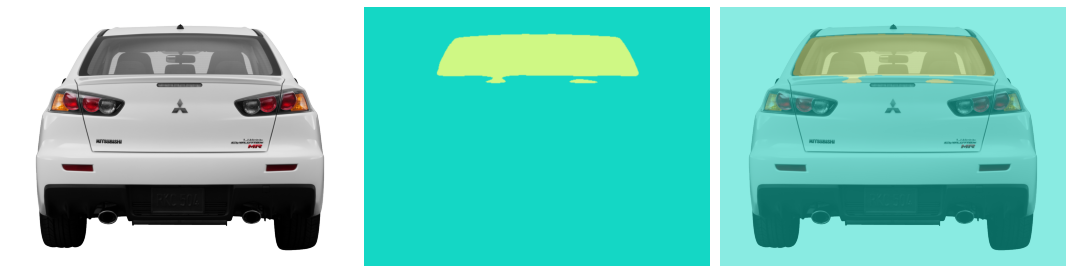

In [44]:
image = imread('/content/SegNet_test_images_1019/7216_st1280_119_1.png')
pred = imread('./predictions/first_test.png')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))

ax1.imshow(image)
ax1.axis('off')
ax2.imshow(pred)
ax2.axis('off')
ax3.imshow(image)
ax3.imshow(pred, alpha=.5)
ax3.axis('off')
plt.tight_layout();

In [14]:
%%capture
for i in test_images:
    filename = i.split('/')[-1].split('.')[0]
    !python -m keras_segmentation predict --checkpoints_path="/mydrive/Biggie/Keras_SegNet/resnet50_segnet" \
    --input_path={i} \
    --output_path="/content/predictions/"{filename}"_pred.png"


In [13]:
prediction_files = sorted(glob('/content/predictions/*'))

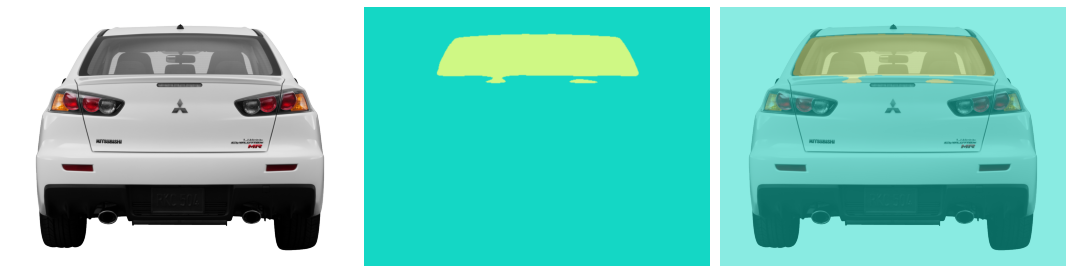

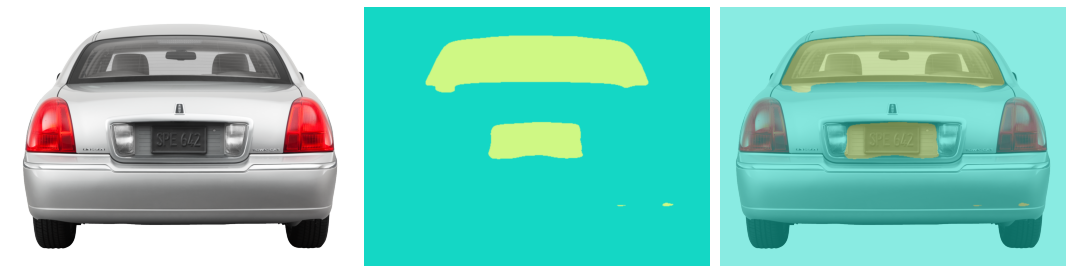

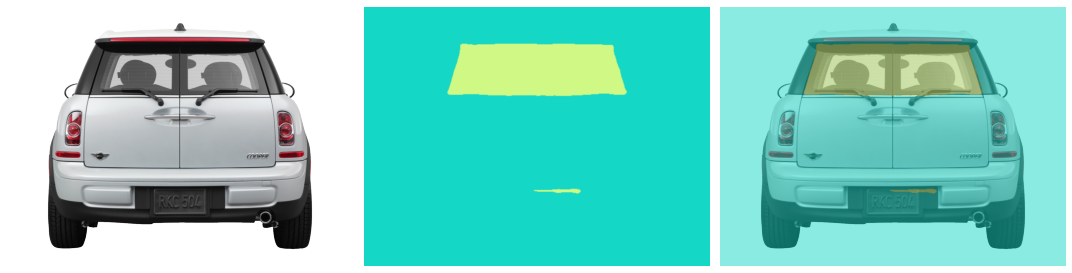

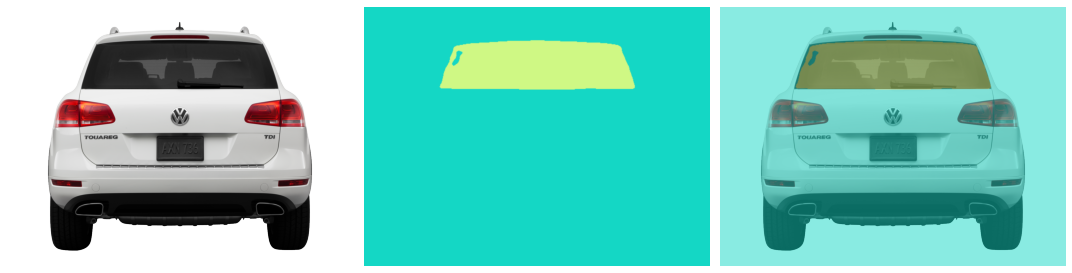

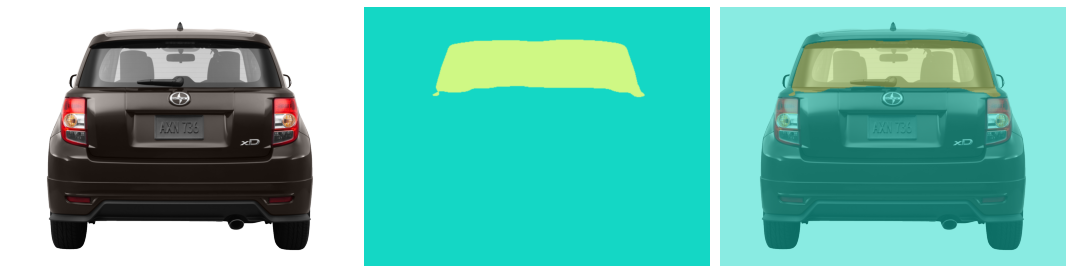

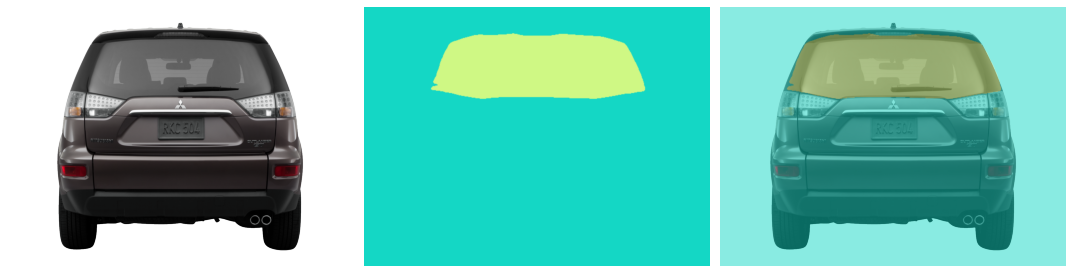

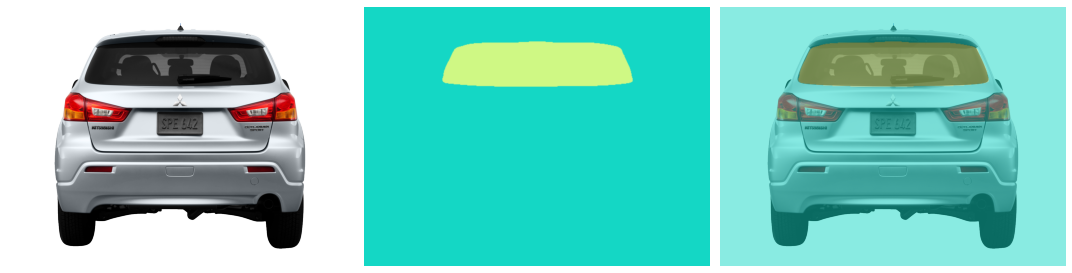

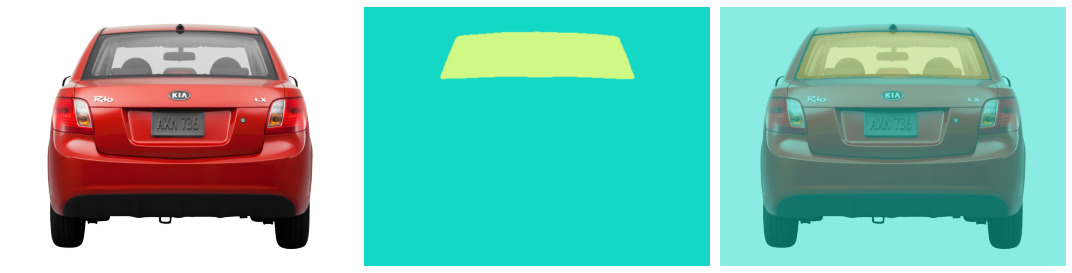

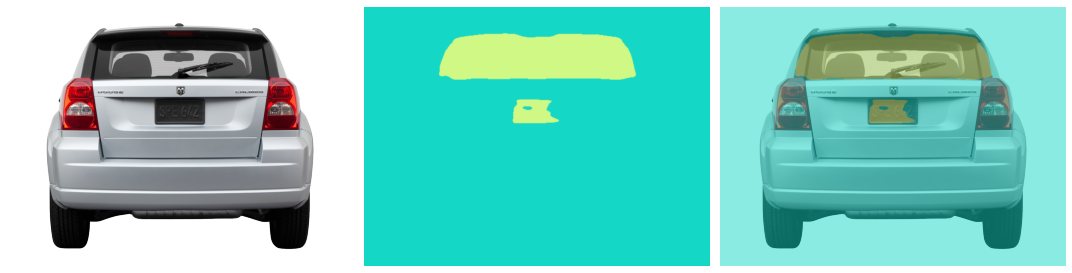

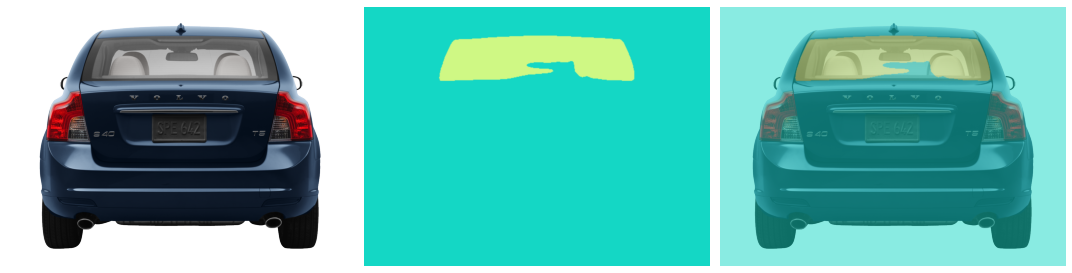

In [18]:
for i,j in zip(test_images, prediction_files):
    image = imread(i)
    pred = imread(j)

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))

    ax1.imshow(image)
    ax1.axis('off')
    ax2.imshow(pred)
    ax2.axis('off')
    ax3.imshow(image)
    ax3.imshow(pred, alpha=.5)
    ax3.axis('off')
    plt.tight_layout();

## VGG PSPNet

In [1]:
## VGG PSPNet

#### Training

In [12]:
! python -m keras_segmentation train --checkpoints_path="/tmp/vgg_pspnet" --train_images="dataset/images_prepped_train/" --train_annotations="dataset/annotations_prepped_train/" --val_images="dataset/images_prepped_test/" --val_annotations="dataset/annotations_prepped_test/" --n_classes=2 --input_height=768 --input_width=1152 --model_name="vgg_pspnet" --epochs=5


2020-10-20 20:34:00.314916: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 20:34:01.646067: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-20 20:34:01.700166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-20 20:34:01.700849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-10-20 20:34:01.700908: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 20:34:01.934227: I tensorflow/stream_executor/platform/default

In [14]:
%%capture
!cp /mydrive/Biggie/Keras_SegNet/SegNet_test_images_1019.zip ./
!unzip ./SegNet_test_images_1019.zip

In [15]:
!mkdir ./predictions

In [16]:
test_images = sorted(glob('./SegNet_test_images_1019/*.png'))

class_dict.csv	predictions		      SegNet_test_images_1019
dataset		sample_data		      SegNet_test_images_1019.zip
gdrive		segnet_initial_train_100
__MACOSX	segnet_initial_train_100.zip


In [19]:
!cp ../tmp/* /mydrive/Biggie/Keras_SegNet/vgg_pspnet/

cp: cannot open '../tmp/drivefs_ipc.0' for reading: No such device or address
cp: cannot open '../tmp/drivefs_ipc.0_shell' for reading: No such device or address
cp: -r not specified; omitting directory '../tmp/__pycache__'
cp: -r not specified; omitting directory '../tmp/tmpm9m_dq_l'


In [35]:
%%capture
for i in test_images:
    filename = i.split('/')[-1].split('.')[0]
    !python -m keras_segmentation predict --checkpoints_path="/tmp/vgg_pspnet" \
    --input_path={i} \
    --output_path="/content/predictions/"{filename}"_pred.png"


In [36]:
prediction_files = sorted(glob('/content/predictions/*'))

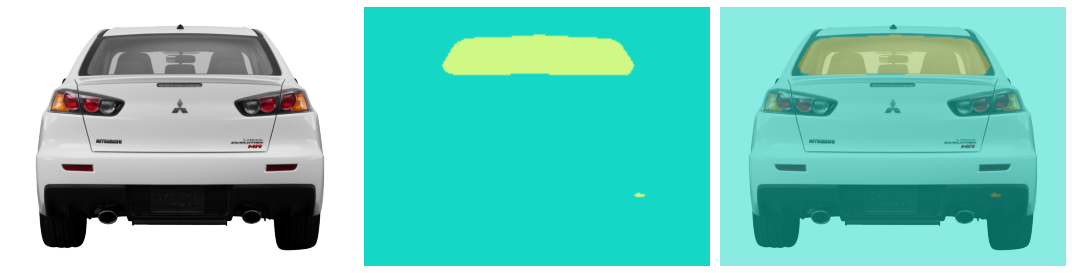

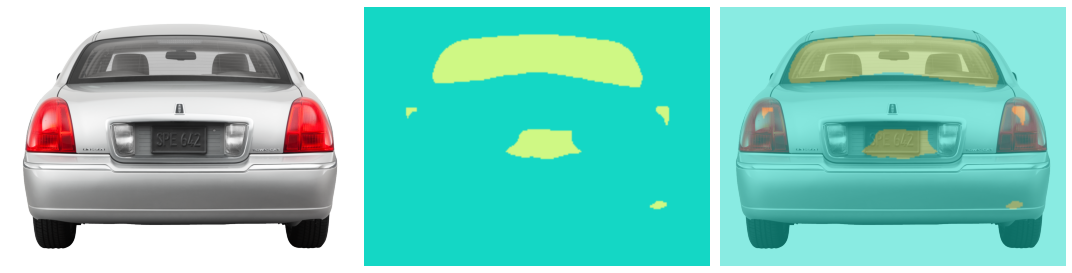

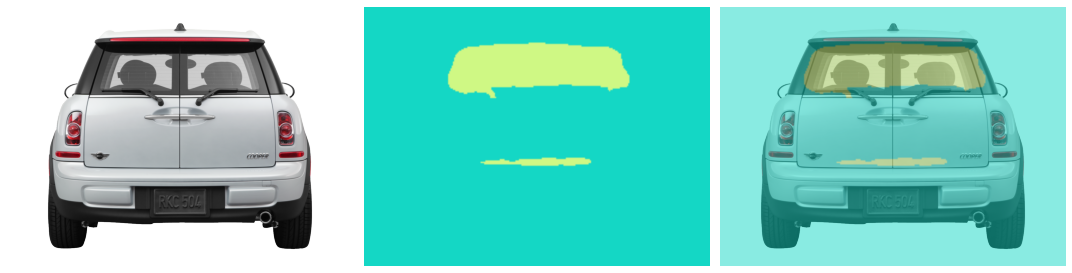

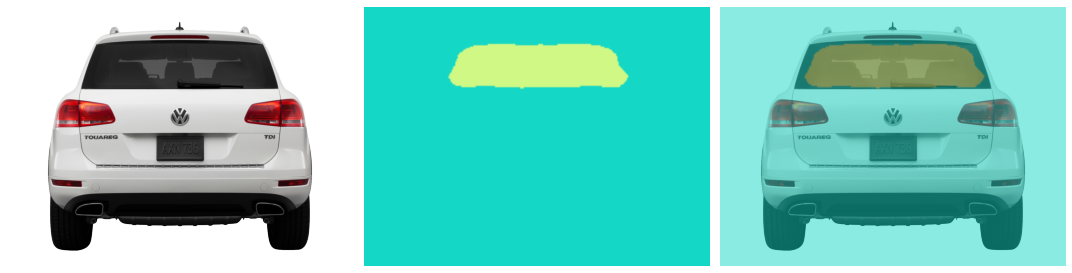

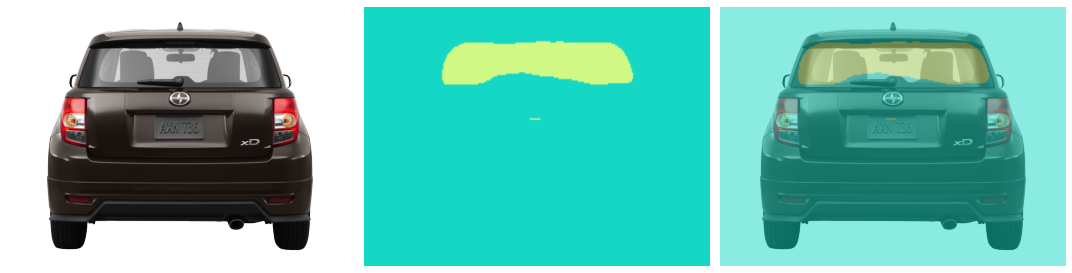

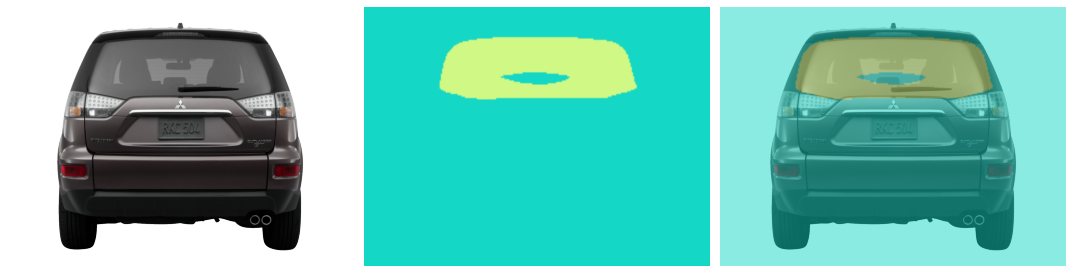

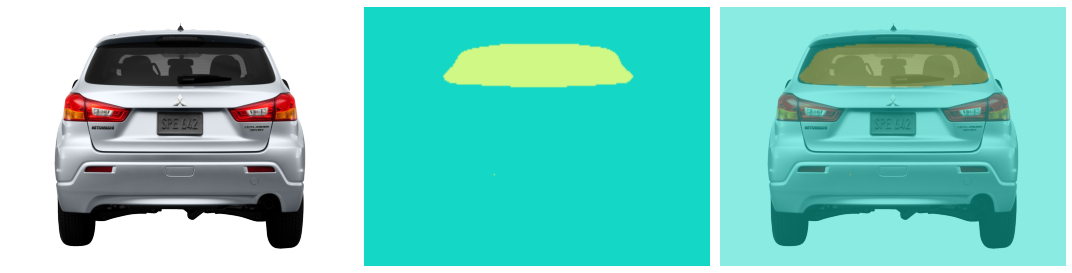

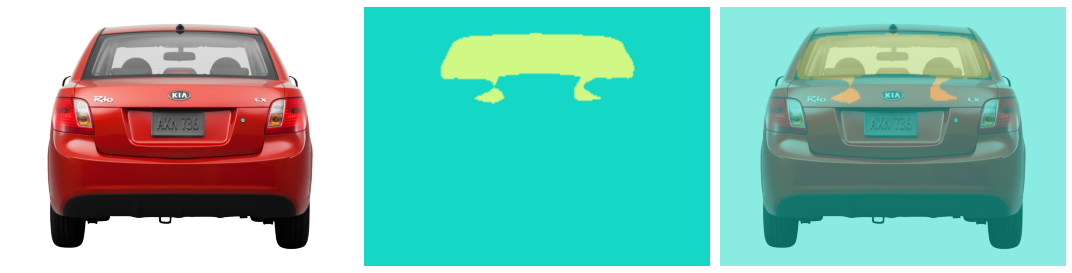

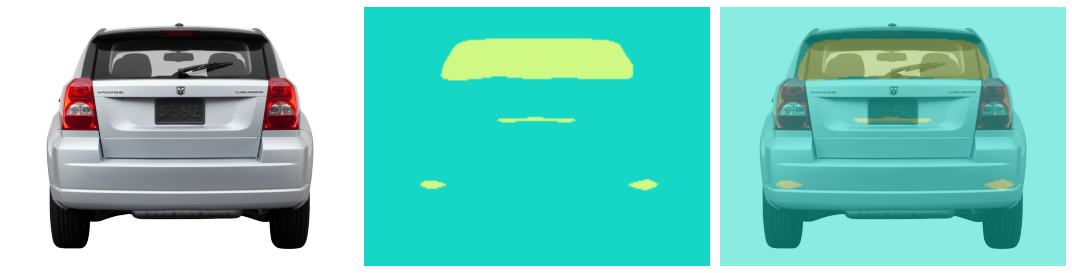

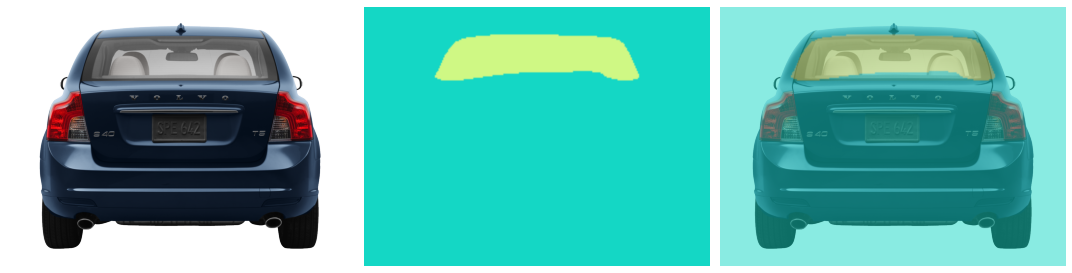

In [37]:
for i,j in zip(test_images, prediction_files):
    image = imread(i)
    pred = imread(j)

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))

    ax1.imshow(image)
    ax1.axis('off')
    ax2.imshow(pred)
    ax2.axis('off')
    ax3.imshow(image)
    ax3.imshow(pred, alpha=.5)
    ax3.axis('off')
    plt.tight_layout();

## MobileNet_UNet

#### Training

In [42]:
! python -m keras_segmentation train --checkpoints_path="/tmp/mobilenet_unet" --train_images="dataset/images_prepped_train/" --train_annotations="dataset/annotations_prepped_train/" --val_images="dataset/images_prepped_test/" --val_annotations="dataset/annotations_prepped_test/" --n_classes=2 --input_height=224 --input_width=224 --model_name="mobilenet_unet" --epochs=5


2020-10-20 21:27:00.556373: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 21:27:01.911870: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-20 21:27:01.951327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-20 21:27:01.951935: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-10-20 21:27:01.952012: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 21:27:01.953888: I tensorflow/stream_executor/platform/default

In [ ]:
%%capture
!cp /mydrive/Biggie/Keras_SegNet/SegNet_test_images_1019.zip ./
!unzip ./SegNet_test_images_1019.zip

In [ ]:
!mkdir ./predictions

In [ ]:
test_images = sorted(glob('./SegNet_test_images_1019/*.png'))

In [ ]:
!cp ../tmp/* /mydrive/Biggie/Keras_SegNet/vgg_pspnet/

In [43]:
%%capture
for i in test_images:
    filename = i.split('/')[-1].split('.')[0]
    !python -m keras_segmentation predict --checkpoints_path="/tmp/mobilenet_unet" \
    --input_path={i} \
    --output_path="/content/predictions/"{filename}"_unet_pred.png"


In [44]:
prediction_files = sorted(glob('/content/predictions/*_unet_pred.png'))

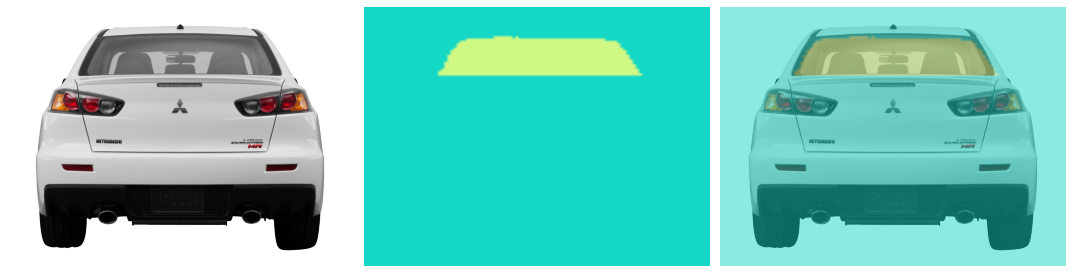

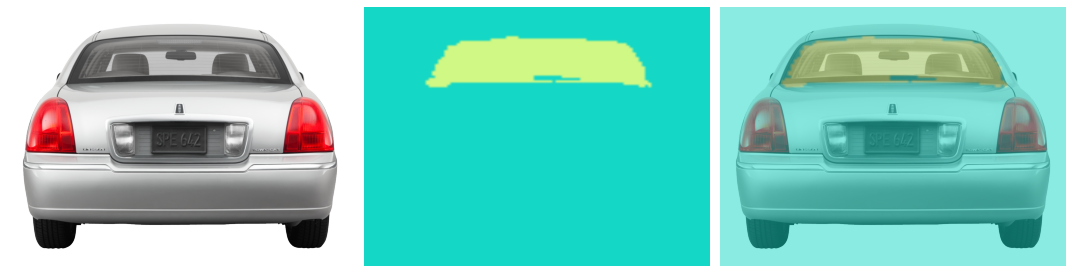

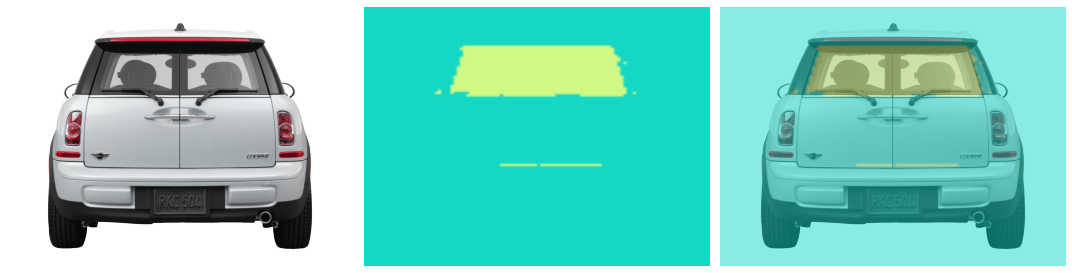

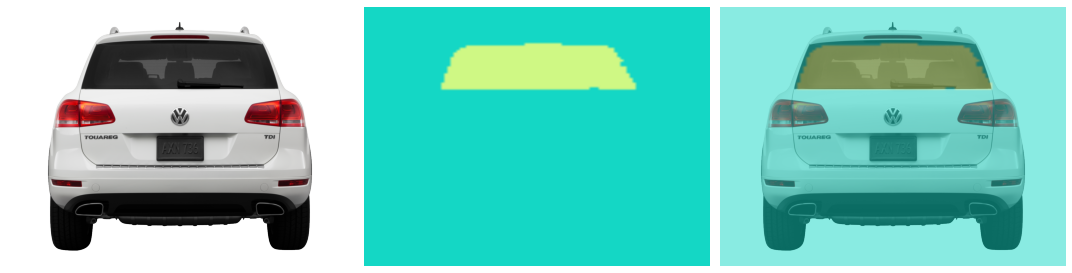

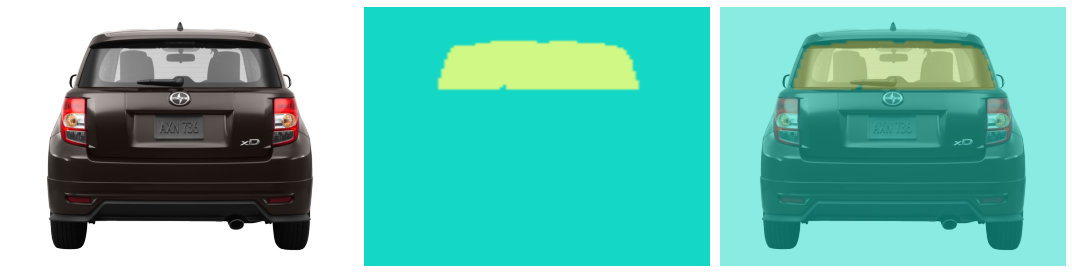

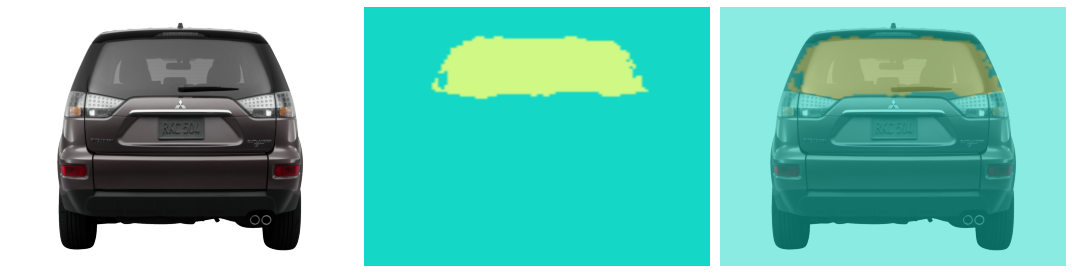

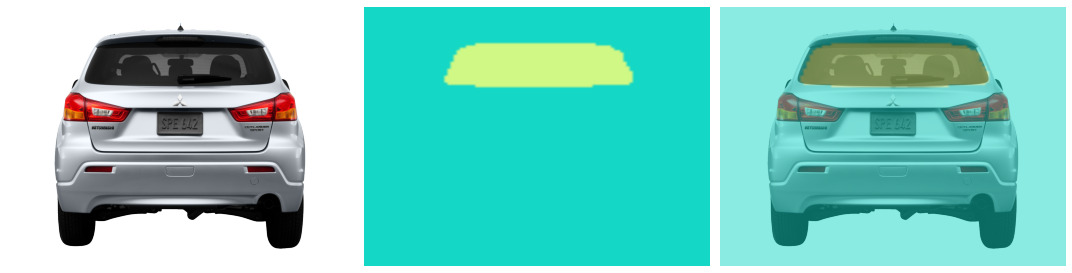

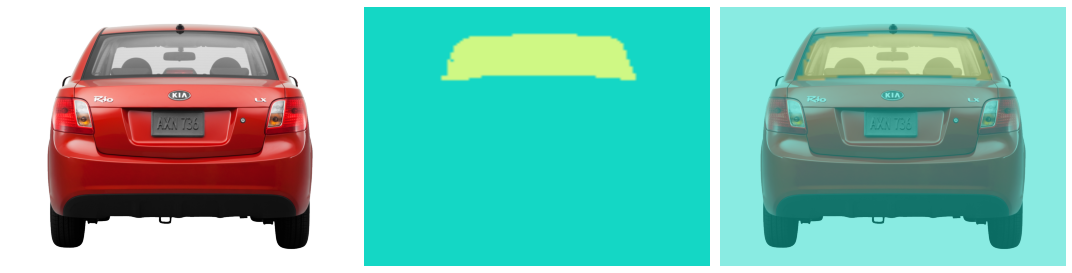

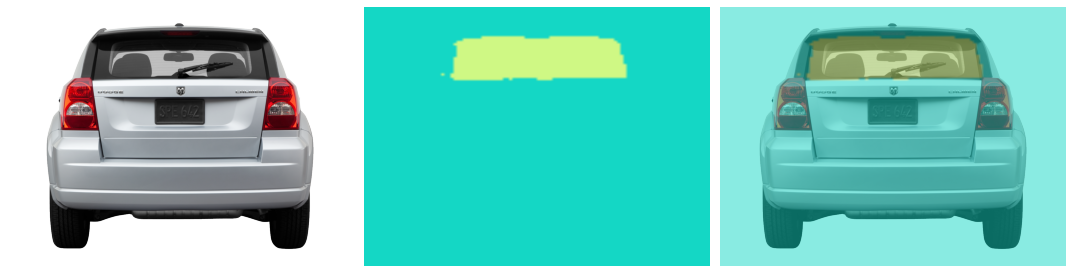

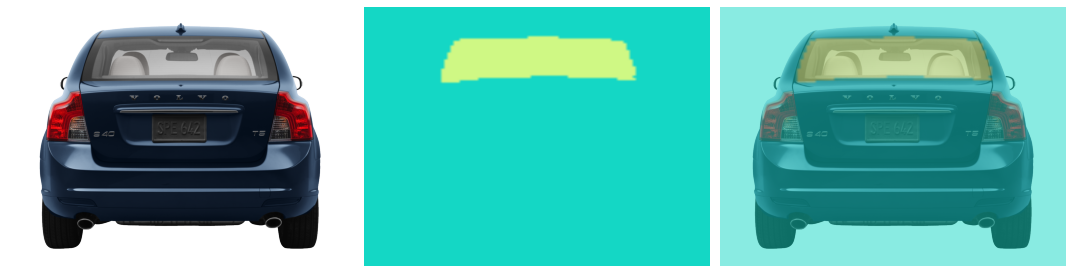

In [45]:
for i,j in zip(test_images, prediction_files):
    image = imread(i)
    pred = imread(j)

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))

    ax1.imshow(image)
    ax1.axis('off')
    ax2.imshow(pred)
    ax2.axis('off')
    ax3.imshow(image)
    ax3.imshow(pred, alpha=.5)
    ax3.axis('off')
    plt.tight_layout();